## Homework 10

### 1) For the system $\dot x = Ax + Bu$.
$$\Large A = \begin{bmatrix} 0 & 1 & 0&0\\ 0 & 0&1&0 \\0 & 0& 0&1\\ 1 & 1&-3&4 \end{bmatrix}, B = \begin{pmatrix} 1&0 \\ 0&0\\0&0\\0&1 \end{pmatrix} $$


First, we need to check controllability of this system.
$$ \mathcal{C} = \begin{bmatrix} B& AB&A^2B&A^3B\end{bmatrix}$$

In [323]:
import numpy as np
A = np.array([[0, 1, 0, 0], 
    [0 , 0 ,1, 0],
    [0, 0, 0, 1],
    [1,1,-3,4]])
B = np.array([[1,0],[0,0],[0,0],[0,1]])
C = np.block([[B,A@B,A@A@B,A@A@A@B]])
print(C)

[[ 1  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  1  1  4]
 [ 0  0  0  1  1  4  4 13]
 [ 0  1  1  4  4 13 13 41]]


In [324]:
rank_C = np.linalg.matrix_rank(C)
print(rank_C)

4


Hence the rank of controllability matrix is 4, (A, B) is controllable. Therefore, eigenvalues of A + BF can be assigned to arbitary.

We write the open loop system in the format of closed loop scheme:
$$\dot x = (A + BF) x $$

#### i). Direct Method

In order to have eigenvalues as $-1 \pm j, -2 \pm j$, $p(\lambda) = (\lambda + (1 - j))(\lambda + (1 + j))(\lambda + (2 - j))(\lambda + (2 + j)) = \lambda^4 + 3\lambda^3+9\lambda^2+9\lambda + 10$ 

$$ F = \begin{bmatrix} f_1 & f_2 & f_3 & f_4\\f_5 & f_6 & f_7 & f_8 \end{bmatrix}$$

$det((A + BF) - \lambda I) = \begin{vmatrix} f_1 - \lambda & f_2+1&f_3&f_4\\0&-\lambda&1&0\\0&0&-\lambda&1\\f_5+1&f_6+1&f_7-3&f_8+4-\lambda \end{vmatrix}$

Then we just need to match the parameters before each order of $\lambda$ to determine each element in matrix F.

#### ii). Assigning eigenvalues and eigenvectors

$[\lambda_j I - (A+BF)] v_j = 0$, which can be written as 
$$ [\lambda_j I - A, B)] \begin{bmatrix}M_j\\-D_j\end{bmatrix} = 0$$,
where $M_j = v_j$ and $D_j = -Fv_j$, and $\begin{bmatrix}M_j\\-D_j\end{bmatrix}$ is in null space of $[\lambda_j I - (A+BF)]$.

In [325]:
space = np.block([eigenvalue*np.identity(4)-A,B])
print(space)
ns = null_space(space)
print(ns)

[[-10.  -1.  -0.  -0.   1.   0.]
 [ -0. -10.  -1.  -0.   0.   0.]
 [ -0.  -0. -10.  -1.   0.   0.]
 [ -1.  -1.   3. -14.   0.   1.]]
[[ 9.95081615e-02 -5.35398214e-05]
 [-6.93046244e-05  6.97132074e-04]
 [ 6.93046244e-04 -6.97132074e-03]
 [-6.93046244e-03  6.97132074e-02]
 [ 9.95012311e-01  1.61733860e-04]
 [ 3.33243956e-04  9.97542457e-01]]


In [326]:
from scipy.linalg import null_space

eigen_lst = [complex(1,-1),complex(1,1),complex(2,1),complex(2,-1)]
M = []
D = []
for i in range(4):
    space = np.block([eigen_lst[i]*np.identity(4)-A,B])
    ns = null_space(space)
    M.append(ns[:4,:])
    D.append(ns[4:,:])
    print('M'+str(i+1)+'=',ns[:4,:])
    print('-D'+str(i+1)+'=',ns[4:,:])


M1= [[-0.47163026-0.29931513j  0.03485599+0.14175242j]
 [-0.04773465+0.12824525j  0.08238075+0.23004205j]
 [ 0.0805106 +0.1759799j   0.3124228 +0.14766129j]
 [ 0.2564905 +0.09546931j  0.46008409-0.16476151j]]
-D1= [[ 0.72321073-0.04406988j -0.09422765+0.12314561j]
 [-0.08689451-0.15611117j  0.72498212-0.10538984j]]
M2= [[-0.47163026+0.29931513j  0.03485599-0.14175242j]
 [-0.04773465-0.12824525j  0.08238075-0.23004205j]
 [ 0.0805106 -0.1759799j   0.3124228 -0.14766129j]
 [ 0.2564905 -0.09546931j  0.46008409+0.16476151j]]
-D2= [[ 0.72321073+0.04406988j -0.09422765-0.12314561j]
 [-0.08689451+0.15611117j  0.72498212+0.10538984j]]
M3= [[-0.34619325+0.15014994j  0.07571395-0.03188855j]
 [ 0.03496254-0.03444648j  0.11463084-0.03956951j]
 [ 0.10437155-0.03393042j  0.26883119+0.03549182j]
 [ 0.24267353+0.0365107j   0.50217057+0.33981482j]]
-D3= [[ 0.87749898+0.01144688j -0.0686856 -0.05150636j]
 [-0.10248761+0.04784261j  0.72800717-0.00047443j]]
M4= [[-0.34619325-0.15014994j  0.07571395+0.03188

Since $\begin{bmatrix} M_j\\-D_j\end{bmatrix} $is a basis, there exists a nonzero $m \times 1$ vector $a_j$ s.t.
$$ \begin{bmatrix}M_j\\-D_j\end{bmatrix}a_j = \begin{bmatrix}v_j\\-Fv_j\end{bmatrix}$$

Combining the relations $-D_ja_j = -Fv_j$ and $M_ja_j = v_j$, we have
$$ FM_ja_j = D_ja_j$$

In [327]:
a1 = np.array([[0,1]])
a2 = np.array([[1,0]])
a3 = np.array([[0,1]])
a4 = np.array([[1,0]])
a_lst = [a1,a2,a3,a4]
V = np.block([[M[i]@a_lst[i].T for i in range(4)]])##M_ja_j
print(V)

[[ 0.03485599+0.14175242j -0.47163026+0.29931513j  0.07571395-0.03188855j
  -0.34619325-0.15014994j]
 [ 0.08238075+0.23004205j -0.04773465-0.12824525j  0.11463084-0.03956951j
   0.03496254+0.03444648j]
 [ 0.3124228 +0.14766129j  0.0805106 -0.1759799j   0.26883119+0.03549182j
   0.10437155+0.03393042j]
 [ 0.46008409-0.16476151j  0.2564905 -0.09546931j  0.50217057+0.33981482j
   0.24267353-0.0365107j ]]


$$ W = D_ja_j$$
$$ FV = W$$

In [328]:
W = np.block([[-D[i]@a_lst[i].T for i in range(4)]])
print(W)

[[ 0.09422765-0.12314561j -0.72321073-0.04406988j  0.0686856 +0.05150636j
  -0.87749898+0.01144688j]
 [-0.72498212+0.10538984j  0.08689451-0.15611117j -0.72800717+0.00047443j
   0.10248761+0.04784261j]]


In [329]:
F = W@np.linalg.inv(V)
print(F)

[[ 2.63063045 -0.16486867j -6.27512366+13.0207129j
   7.83301688-10.5569111j  -2.38649752 +3.54059699j]
 [-0.86648044 +0.46904395j  0.2247396  -0.20292617j
  -1.12991246 +0.52483833j -0.63063045 +0.16486867j]]


### 2) Consider the system $\dot x = \begin{bmatrix} 0&1\\1&1\end{bmatrix} x + \begin{bmatrix} 1\\0 \end{bmatrix} u.$ and the performance indices $J_1, J_2$ given by
$$\large J_1 = \int_0^\infty (x_1^2+x_2^2+u^2)dt ~~~~\text{and} ~~~ J_2 = \int_0^\infty (900(x_1^2+x_2^2)+u^2)dt$$

The generalized format of quadratic cost is 
$$J(u) = \int_0^\infty [z^\top Qz+u^\top Ru]dt,$$
where $z = Mx$.
If we try to minimize $J_1$, then $R = \begin{bmatrix} 1&0\\0&1\end{bmatrix}$, $Q = \begin{bmatrix} 1&0\\0&1\end{bmatrix}$, $M = 1$.

The optimal control $u^*$ is given by 
$$ u^* = F^*x = -R^{-1}B^\top Sx,$$
where S denotes the symmetric positive definite solution of the algebraic Riccati equation
$$ A^\top S + SA -SBR^{-1}B^\top S + M^\top QM = 0 $$

In [110]:
R = 1
M = 1
Q = np.identity(2)
A = np.array([[0,1],[1,1]])
B = np.array([[1,0]])
import scipy.linalg as sl
S = sl.solve_continuous_are(A,B.T,Q,R)
print(S)

[[ 3.73205081  6.46410162]
 [ 6.46410162 13.92820323]]


In [103]:
n = 1000
t = np.linspace(0,50,n)

def RHS(x, t):
    
    A = np.array([[0,1],[1,1]])
    B = np.array([[1,0]])
    Q = np.identity(2)
    R = 1
    S = sl.solve_continuous_are(A,B.T,Q,R)
    
    dxdt = (A-B.T@B@S)@x
    return dxdt

from scipy.integrate import odeint

x0 = np.array([1,1])

sol = odeint(RHS, x0, t)

print(sol)

[[ 1.00000000e+00  1.00000000e+00]
 [ 5.68051686e-01  1.09141718e+00]
 [ 1.89004685e-01  1.16672666e+00]
 ...
 [ 2.69391416e-10 -1.34669925e-10]
 [ 2.60746821e-10 -1.30348821e-10]
 [ 2.51973167e-10 -1.25963203e-10]]


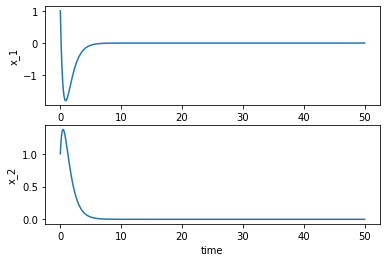

In [104]:
import matplotlib.pyplot as plt

%matplotlib inline

fig, axs = plt.subplots(2, 1)
axs[0].plot(t,sol[:,0])
axs[0].set_ylabel('x_1')
axs[0].set_xlabel('time')
axs[1].plot(t,sol[:,1])
axs[1].set_ylabel('x_2')
axs[1].set_xlabel('time')

plt.show()

In [105]:
u = [-B@S@sol[i,:] for i in range(n)]
u = np.vstack(u)
#print(np.vstack(u))

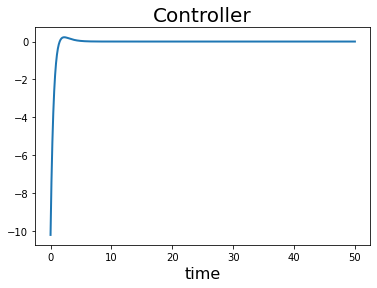

In [106]:
plt.figure()
plt.plot(t, u, linewidth = 2.0)
plt.title('Controller', fontsize = 20)
plt.xlabel('time', fontsize = 16)
plt.show()

Then we minimize $$J_2 = \int_0^\infty (900(x_1^2+x_2^2)+u^2)dt$$
R = 1, M = 30, and $Q = \begin{bmatrix} 1&0\\0&1 \end{bmatrix}$

In [113]:
R = 1
M = 30
Q = np.identity(2)
Q = M*Q
A = np.array([[0,1],[1,1]])
B = np.array([[1,0]])
import scipy.linalg as sl
S = sl.solve_continuous_are(A,B.T,Q,R)
print(S)

[[  7.97284012  16.7830898 ]
 [ 16.7830898  109.05296177]]


In [114]:
n = 1000
t = np.linspace(0,50,n)

def RHS(x, t):
    
    R = 1
    M = 30
    Q = np.identity(2)
    Q = M*Q
    A = np.array([[0,1],[1,1]])
    B = np.array([[1,0]])
    S = sl.solve_continuous_are(A,B.T,Q,R)
    
    dxdt = (A-B.T@B@S)@x
    return dxdt

from scipy.integrate import odeint

x0 = np.array([1,1])

sol = odeint(RHS, x0, t)

print(sol)

[[ 1.00000000e+00  1.00000000e+00]
 [-9.14152694e-03  1.07550149e+00]
 [-7.20838705e-01  1.11102659e+00]
 ...
 [ 6.94477828e-11 -2.90306976e-11]
 [ 6.65771896e-11 -2.78372996e-11]
 [ 6.37561644e-11 -2.66643243e-11]]


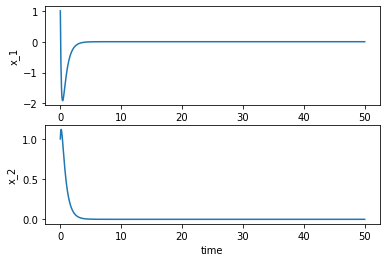

In [115]:
%matplotlib inline

fig, axs = plt.subplots(2, 1)
axs[0].plot(t,sol[:,0])
axs[0].set_ylabel('x_1')
axs[0].set_xlabel('time')
axs[1].plot(t,sol[:,1])
axs[1].set_ylabel('x_2')
axs[1].set_xlabel('time')

plt.show()

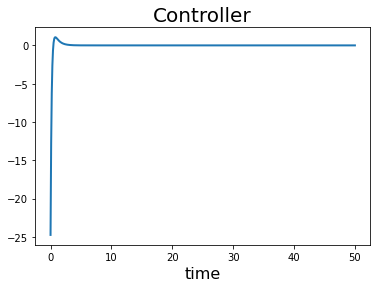

In [116]:
u = [-B@S@sol[i,:] for i in range(n)]
u = np.vstack(u)
plt.figure()
plt.plot(t, u, linewidth = 2.0)
plt.title('Controller', fontsize = 20)
plt.xlabel('time', fontsize = 16)
plt.show()

For cost function $J_1$, we have equal weights on requlation of $x \to 0$ and the regulation of using a controller, while, in the cost function $J_2$, the $Q$ is "bigger" than $R$, so the first term dominates. That is we care more about making states back to 0 as soon as possilble no matter how much control we have to use. As it is reflected in the plots, the time taking states back to 0 used by the $J_1$ is longer than that of $J_2$ but the magnintude of control is less than that of $J_2$.

### 3) Consider the system from problem 4.27:
$$\Large \dot x = \begin{bmatrix} 0 & 11 & 0 & 0 \\ 1 & 0 & 0 & 0 \\ 0 & -1 &0 & 0 \\ 0 & 0  & 1 & 0 \end{bmatrix} x + \begin{pmatrix} -1 \\ 0 \\ 1 \\ 0 \end{pmatrix} u.$$

In this setup $x_2 \sim \theta$ and $x_4 \sim x$ (we have linearized). 

In [264]:
A = np.array([[1,11,0,0],[1,0,0,0],[0,-1,0,0],[0,0,1,0]])
w,v = np.linalg.eig(A)
print('Eigenvalues are\n', w)
print('According Eigenvvectors are\n', v)


Eigenvalues are
 [ 0.          0.         -2.85410197  3.85410197]
According Eigenvvectors are
 [[ 0.00000000e+000  0.00000000e+000  9.36716662e-001 -9.65762749e-001]
 [ 0.00000000e+000  0.00000000e+000 -3.28200139e-001 -2.50580487e-001]
 [ 0.00000000e+000  4.00833672e-292 -1.14992436e-001  6.50165692e-002]
 [ 1.00000000e+000 -1.00000000e+000  4.02902341e-002  1.68694471e-002]]


In [265]:
### Plot states with control = 0
n = 1000
t = np.linspace(0,10,n)

def RHS(x, t):
    A = np.array([[0,11,0,0],[1,0,0,0],[0,-1,0,0],[0,0,1,0]])
    #B = np.array([[-1,0,1,0]])
    
    dxdt = A@x
    return dxdt

from scipy.integrate import odeint

### Initial state
x0 = np.array([0.01, 0, 0,0])

sol = odeint(RHS, x0, t)

print(sol)

[[ 1.00000000e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.00055122e-02  1.00124330e-04 -5.01107728e-07 -2.20273803e-09]
 [ 1.00220545e-02  2.00357601e-04 -2.00495896e-06 -1.43091182e-08]
 ...
 [ 1.18591765e+12  3.57567625e+11 -1.07810695e+11 -3.25061477e+10]
 [ 1.22595032e+12  3.69637928e+11 -1.11450029e+11 -3.36034480e+10]
 [ 1.26733435e+12  3.82115684e+11 -1.15212214e+11 -3.47377895e+10]]


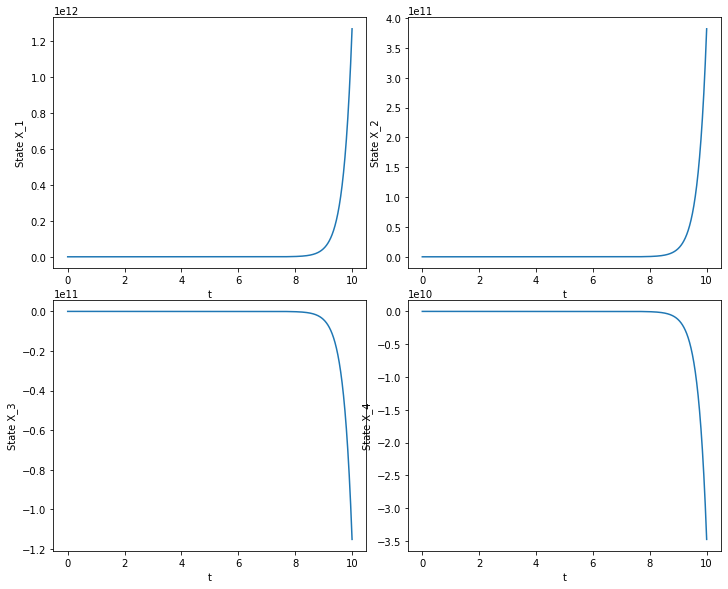

In [266]:
%matplotlib inline
I = range(4)
f, axarray = plt.subplots(2,2,figsize=(10, 8))
f.tight_layout()
for i,ax in zip(I,axarray.flatten()):
    ax.plot(t,sol[:,i])
    ax.set_ylabel('State X_'+str(i+1))
    ax.set_xlabel('t')

Change initial state to $x_0 = [0,0,0,0]^\top $, then plot the figures of state $x(t)$.

In [267]:
x0 = np.array([0, 0, 0,0])

sol = odeint(RHS, x0, t)

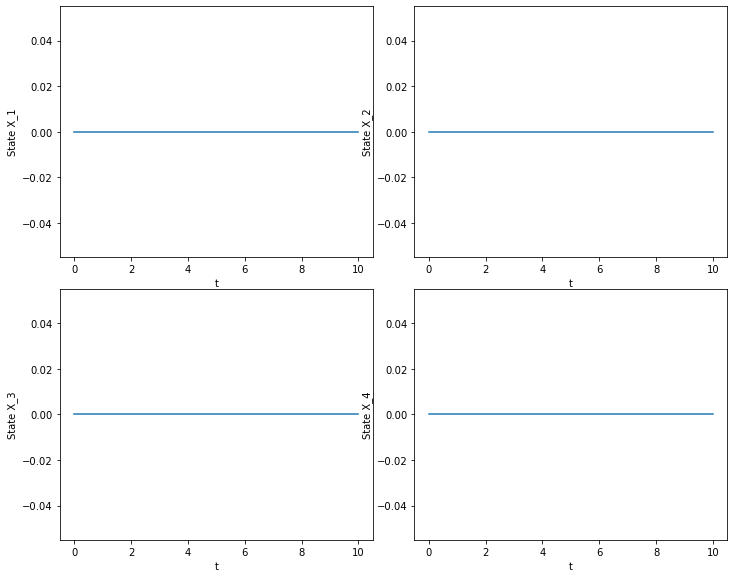

In [268]:
%matplotlib inline
I = range(4)
f, axarray = plt.subplots(2,2,figsize=(10, 8))
f.tight_layout()
for i,ax in zip(I,axarray.flatten()):
    ax.plot(t,sol[:,i])
    ax.set_ylabel('State X_'+str(i+1))
    ax.set_xlabel('t')

Without surprise, those are horizontal lines since $[0,0,0,0]$ is stable state and without control u, the system will maintain in the state forever.

Add a unit u into the system.

In [269]:
def RHS(x, t):
    A = np.array([[0,11,0,0],[1,0,0,0],[0,-1,0,0],[0,0,1,0]])
    B = np.array([-1,0,1,0])
    u = 1
    dxdt = A@x + B.T*u
    return dxdt

In [270]:
x0 = np.array([0, 0, 0,0])

sol = odeint(RHS, x0, t)

print(sol)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.00118638e-02 -5.01049100e-05  1.00101785e-02  5.01005843e-05]
 [-2.00347489e-02 -2.00474543e-04  2.00213590e-02  2.00407324e-04]
 ...
 [-3.57565737e+13 -1.07810126e+13  3.25059761e+12  9.80092056e+11]
 [-3.69635976e+13 -1.11449440e+13  3.36032705e+12  1.01317673e+12]
 [-3.82113667e+13 -1.15211605e+13  3.47376060e+12  1.04737823e+12]]


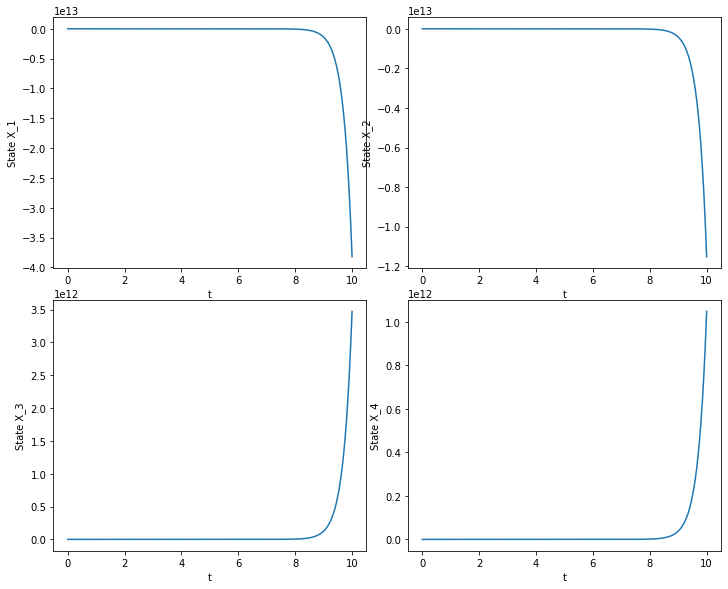

In [271]:
%matplotlib inline
I = range(4)
f, axarray = plt.subplots(2,2,figsize=(10, 8))
f.tight_layout()
for i,ax in zip(I,axarray.flatten()):
    ax.plot(t,sol[:,i])
    ax.set_ylabel('State X_'+str(i+1))
    ax.set_xlabel('t')

As we can see from the plots above, adding a unit controller will change the states gradually. But it is not able to make the system stable.

First, we need to check controllability of this system.
$$ \mathcal{C} = \begin{bmatrix} B& AB&A^2B&A^3B\end{bmatrix}$$

In [272]:
A = np.array([[0, 11, 0, 0], 
    [1 , 0 ,0, 0],
    [0, -1, 0, 0],
    [0,0,1,0]])
B = np.array([[-1,0,1,0]])
C = np.block([[B.T,A@B.T,A@A@B.T,A@A@A@B.T]])
print(C)

[[ -1   0 -11   0]
 [  0  -1   0 -11]
 [  1   0   1   0]
 [  0   1   0   1]]


In [273]:
rank_C = np.linalg.matrix_rank(C)
print(rank_C)

4


Hence the rank of controllability matrix is 4, (A, B) is controllable. Therefore, eigenvalues of A + BF can be assigned to arbitary.

#### Assigning eigenvalues and eigenvectors

$[\lambda_j I - (A+BF)] v_j = 0$, which can be written as 
$$ [\lambda_j I - A, B)] \begin{bmatrix}M_j\\-D_j\end{bmatrix} = 0$$,
where $M_j = v_j$ and $D_j = -Fv_j$, and $\begin{bmatrix}M_j\\-D_j\end{bmatrix}$ is in null space of $[\lambda_j I - A,B)]$.


$$ W = D_ja_j$$
$$ FV = W$$


In [317]:
eigen_lst = [-10,-3,-1,-1/2]
M = []
D = []
for i in range(4):
    space = np.block([eigen_lst[i]*np.identity(4)-A,B.T])
    ns = null_space(space)
    M.append(ns[:4,:])
    D.append(ns[4:,:])
    print('M'+str(i+1)+'=',ns[:4,:])
    print('-D'+str(i+1)+'=',ns[4:,:])

M1= [[-0.11108499]
 [ 0.0111085 ]
 [ 0.09997649]
 [-0.00999765]]
-D1= [[0.9886564]]
M2= [[ 0.79827173]
 [-0.26609058]
 [ 0.08869686]
 [-0.02956562]]
-D2= [[0.53218116]]
M3= [[ 0.06154575]
 [-0.06154575]
 [ 0.55391171]
 [-0.55391171]]
-D3= [[0.61545745]]
M4= [[ 0.01113019]
 [-0.02226039]
 [ 0.43407753]
 [-0.86815506]]
-D4= [[0.23929915]]


In [318]:
a1 = np.array([[-5]])
a2 = np.array([[2]])
a3 = np.array([[-2]])
a4 = np.array([[0.5]])
a_lst = [a1,a2,a3,a4]
V = np.block([[M[i]*a_lst[i].T for i in range(4)]])##M_ja_j
print(V)

[[ 0.55542494  1.59654347 -0.12309149  0.0055651 ]
 [-0.05554249 -0.53218116  0.12309149 -0.01113019]
 [-0.49988245  0.17739372 -1.10782342  0.21703877]
 [ 0.04998824 -0.05913124  1.10782342 -0.43407753]]


In [319]:
W = np.block([[-D[i]*a_lst[i].T for i in range(4)]])
print(W)

[[ 4.94328199 -1.06436231  1.23091491 -0.11964958]]


In [320]:
F_1 = W@np.linalg.inv(V)
print(F_1)

[[19.65 62.5   5.15  1.5 ]]


$u = Fx$, and we find the control u.

In [283]:
np.linalg.eig(A+B.T@F_1)

(array([18.53647251+0.j        , -0.39657865+0.30369053j,
        -0.39657865-0.30369053j, -3.24331521+0.j        ]),
 array([[-0.71642839+0.j        , -0.00451175-0.01026784j,
         -0.00451175+0.01026784j, -0.95444708+0.j        ],
        [-0.03864966+0.j        , -0.00532653+0.02181214j,
         -0.00532653-0.02181214j,  0.29428132+0.j        ],
        [ 0.69557779+0.j        ,  0.35466957-0.27159754j,
          0.35466957+0.27159754j,  0.04709981+0.j        ],
        [ 0.03752482+0.j        , -0.8943234 +0.j        ,
         -0.8943234 -0.j        , -0.01452212+0.j        ]]))

#### Use the LQR formulation to determine a stabilizing linear state feedback control law u = Fx + r.

In [221]:
### Choose equal weights for cost of state not being 0 and cost of controller not being 0.
R = 1
M = 1
Q = np.identity(4)
A = np.array([[0, 11, 0, 0], 
    [1 , 0 ,0, 0],
    [0, -1, 0, 0],
    [0,0,1,0]])
B = np.array([[-1,0,1,0]])
import scipy.linalg as sl
S = sl.solve_continuous_are(A,B.T,Q,R)
print(S)

[[ 17.83793941  57.39207669   7.07763489   3.39093134]
 [ 57.39207669 186.49514397  22.48276331  10.76030452]
 [  7.07763489  22.48276331   4.67308448   2.39093134]
 [  3.39093134  10.76030452   2.39093134   2.40455041]]


$F = -R^{-1}B^\top S$

In [222]:
F_2 = -1*B@S
print(F_2)

[[10.76030452 34.90931338  2.40455041  1.        ]]


#### Let $x(0)^\top$ = [0.5, 0, 0, 0]. Repeat (b) for the closed-loop system derived in (c) and (d).

In [223]:
### Closed-loop system derived in (d)
n = 1000
t = np.linspace(0,20,n)

def RHS(x, t):
    
    A = np.array([[0, 11, 0, 0], 
    [1 , 0 ,0, 0],
    [0, -1, 0, 0],
    [0,0,1,0]])
    B = np.array([[-1,0,1,0]])
    Q = np.identity(4)
    R = 1
    S = sl.solve_continuous_are(A,B.T,Q,R)
    
    dxdt = (A-B.T@B@S)@x
    return dxdt

from scipy.integrate import odeint

x0 = np.array([0.5,0,0,0])

sol = odeint(RHS, x0, t)

print(sol)

[[ 5.00000000e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.98687477e-01  8.97487206e-03  1.02244746e-01  1.04147259e-03]
 [ 3.09348687e-01  1.60433398e-02  1.94117693e-01  4.02468563e-03]
 ...
 [-3.33061782e-08  2.78554497e-08 -9.70359139e-08 -1.02872098e-07]
 [-3.27392435e-08  2.71943167e-08 -9.20839717e-08 -1.04775650e-07]
 [-3.21779467e-08  2.65441769e-08 -8.72537558e-08 -1.06585230e-07]]


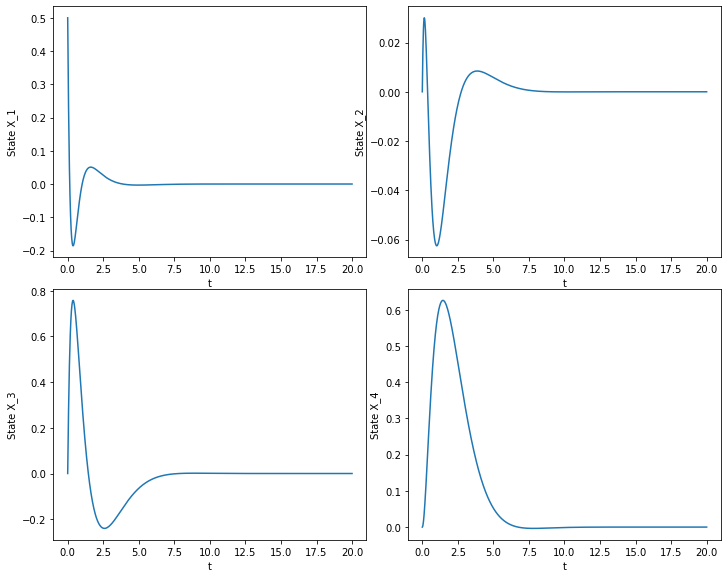

In [224]:
%matplotlib inline
I = range(4)
f, axarray = plt.subplots(2,2,figsize=(10, 8))
f.tight_layout()
for i,ax in zip(I,axarray.flatten()):
    ax.plot(t,sol[:,i])
    ax.set_ylabel('State X_'+str(i+1))
    ax.set_xlabel('t')

In [321]:
### Closed-loop system derived in (c)

def RHS(x, t):
    
    A = np.array([[0, 11, 0, 0], 
    [1 , 0 ,0, 0],
    [0, -1, 0, 0],
    [0,0,1,0]])
    B = np.array([[-1,0,1,0]])
    
    dxdt = (A+B.T@F_1)@x
    return dxdt

from scipy.integrate import odeint

x0 = np.array([0.5,0,0,0])

sol = odeint(RHS, x0, t)

print(sol)

[[ 5.00000000e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.07299000e-01  4.53177720e-03  9.29355561e-02  4.74023435e-04]
 [ 3.25131978e-01  8.18926882e-03  1.75746126e-01  1.82680046e-03]
 ...
 [-1.77878834e-04  3.67722918e-04 -7.29623205e-03  1.47001514e-02]
 [-1.77050191e-04  3.65946501e-04 -7.26034064e-03  1.46272959e-02]
 [-1.76225088e-04  3.64178359e-04 -7.22462309e-03  1.45547989e-02]]


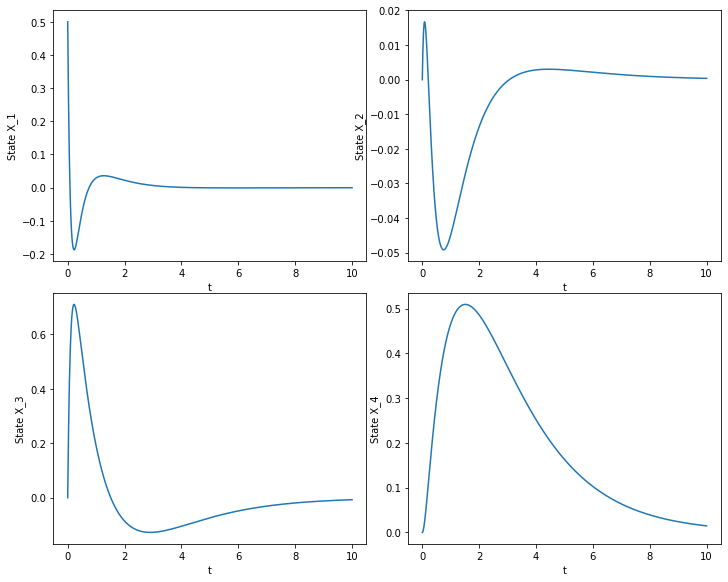

In [322]:
%matplotlib inline
I = range(4)
f, axarray = plt.subplots(2,2,figsize=(10, 8))
f.tight_layout()
for i,ax in zip(I,axarray.flatten()):
    ax.plot(t,sol[:,i])
    ax.set_ylabel('State X_'+str(i+1))
    ax.set_xlabel('t')

### 4) Suppose that $A= \begin{bmatrix}0&1&0\\2&-1&0\\1&0&0 \end{bmatrix}$,$B=\begin{bmatrix}0&0\\1&1\\0&1 \end{bmatrix}$. $C = \begin{bmatrix} 1& 1&0 \end{bmatrix}$. Show that (A,B) is controllable, that A is not asymptotically stable, and that (A,C) is not observable. Consider the feedback control u=Fx, with $F=\begin{bmatrix}3&7&5\\-5&-6&-4 \end{bmatrix}$. Show that this feedback control both i) stabilizes the system and ii) makes the system observable. This exercise shows that observability (or unobservability) are not preserved under feedback control.

In [250]:
A = np.array([[0, 1, 0], 
    [2 , -1 ,0],
    [1, 0, 0]])
B = np.array([[0,0],[1,1],[0,1]])
C = np.block([[B,A@B,A@A@B]])
print(C)

[[ 0  0  1  1 -1 -1]
 [ 1  1 -1 -1  3  3]
 [ 0  1  0  0  1  1]]


In [251]:
rank_C = np.linalg.matrix_rank(C)
print(rank_C)

3


Since the rank of controllability matrix is 3, the system is controllable.

In [253]:
w,v = np.linalg.eig(A)
print('Eigenvalues of matrix A are: ',w)

Eigenvalues of matrix A are:  [ 0. -2.  1.]


As we can see that not all eigenvalues of matrix A are less or equal to 0, i.e. one of eigenvalue = 1, A is not asymptotically stable.

The observability matrix is:
$$\mathcal{O} = \begin{bmatrix}C^T &(CA)^T &(CA^2)^T  \\ \end{bmatrix}$$

In [254]:
C = np.array([[1,1,0]])
O = np.block([[C.T,(C@A).T,(C@A@A).T]])
print(O)

[[1 2 0]
 [1 0 2]
 [0 0 0]]


In [255]:
rank_O = np.linalg.matrix_rank(O)
print(rank_O)

2


Since the rank of observability matrix is 2, which is less than 3, the system is not observable.

Closed-loop system:
$$ \dot x = (A + BF) x.$$

In [257]:
F = np.array([[3,7,5],[-5,-6,-4]])
w,v = np.linalg.eig(A+B@F)
print('Eigenvalues of matrix A + BF are: ',w)

Eigenvalues of matrix A + BF are:  [-1.+1.j -1.-1.j -2.+0.j]


This time, the real part of all eigenvalues are less than 0, the system becomes stable.

In [262]:
A_ = A+B@F
O_ = np.block([[C.T,(C@A_).T,(C@A_@A_).T]])
rank_O_ = np.linalg.matrix_rank(O_)
print(rank_O_)

3


After introducing the controller, the system becomes observable.

### 5) Show that if a matrix $A−BF=\tilde A$  has eigenvalues with strictly negative real part then there exists a δ>0 so that for any ‖E‖<δ we have that Ã +E also has eigenvalues with strictly negative real part. This indicates why feedback controls are able to accommodate some model misspecification.

We note that a matrix 𝑀 has eigenvalues with negative real part if $𝑥^\top𝑀𝑥<0$ for all 𝑥∈ℝ𝑛 with 𝑥≠0.
$$x^\top(\tilde A + E)x = x^\top \tilde Ax + x^\top Ex$$

$\lambda = \lambda_{max}(\tilde A) = min \left|\frac{ x^\top \tilde Ax}{x^\top x}\right|$.
In order to make $x^\top(\tilde A + E)x$ still negative, we need to make sure that the minimum absolute value of $x^\top \tilde Ax$ is greater than the maximum absolute value of $x^\top Ex$.

That is $|\lambda| > max \left|\frac{x^\top Ex}{x^\top x}\right|$

$max \left|\frac{x^\top Ex}{x^\top x}\right| \leq max \left|\frac{\|Ex\|}{\|x\|}\right| = \|E\| = \delta$

Therefore, there exists a $\delta > 0$ such that $|\lambda| > \delta$ and $\tilde A + E $ has eigenvalues with strictly negative real part. 